# Background: 
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

# Objective: 
To visualise how honey production is changed over the years (1998-2016) in the United States. 

# Key questions to be answered:

* How has honey production yield changed from 1998 to 2016?
* Over time, what are the major production trends been across the states?
* Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

# Dataset:

* state: Various states of U.S.
* numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* yieldpercol: Honey yield per colony. Unit is pounds
* totalprod: Total production (numcol x yieldpercol). Unit is pounds
* stocks: Refers to stocks held by producers. Unit is pounds
* priceperlb: Refers to average price per pound based on expanded sales. The unit is dollars.
* prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.
* year: Year of production

In [1]:
# Import the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the file
honey = pd.read_csv('honeyproduction1998-2016.csv')

In [3]:
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
honey.shape

(785, 8)

* 785 rows, 8 different columns

In [5]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


Observations:
* Looks like there are 785 datapoints
* Note: year is written as an integer datatype here, but is actually categorical. Will need to convert it to one.
* Numerical: numcol, yieldpercol, totalprod, stocks, priceperlb, prodvalue
* Categorical: state, year (after conversion)

In [6]:
honey.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,785.000000,785.000000,7.850000e+02,7.850000e+02,785.000000,7.850000e+02,785.000000
mean,61686.624204,60.578344,4.140957e+06,1.257629e+06,1.695159,5.489739e+06,2006.817834
std,92748.940458,19.427831,6.884594e+06,2.211794e+06,0.930623,9.425394e+06,5.491523
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,46.000000,4.700000e+05,1.190000e+05,1.050000,9.010000e+05,2002.000000
50%,26000.000000,58.000000,1.500000e+06,3.910000e+05,1.480000,2.112000e+06,2007.000000
75%,65000.000000,72.000000,4.096000e+06,1.380000e+06,2.040000,5.559000e+06,2012.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,7.090000,8.385900e+07,2016.000000


#### Observations: 
* num_col: mean is 62k, std deviation is large, min is 2k, max is 510k. Seems to be skewed to the right, leaning towards the lower side. 
* yieldpercol: mean is 61, std is not too large, min is 19, max is 136. Also skewed to the right
* totalprod: mean is 4.4 mil, std dev is very large, min is 84k, max is 46mil, also skewed to the right
* stocks: mean is 1.2 mil, std dev is very large, min is 8k, max is 13 mil, also skewed to the right
* priceperlib: mean 1.69, low std dev, min is 0.49, max is 7.09, also skewed to the right
* prodvalue: mean 5.48 mil, high std dev, min is 162k, max is 84 mil, also skewed to the right

* Will need to visualize the dataset to better understand each one/outliers

## Univariate analysis

### State

In [7]:
#cleaning/organizing the list of states
state_sort = honey['state'].value_counts().reset_index()
state_sort = state_sort.rename(columns={"state" : "state_count"}).sort_values(["state_count","index"]).reset_index()
state_sort = state_sort.drop('level_0',axis=1)
state_sort

,index,state_count
0,Maryland,6
1,Oklahoma,6
2,South Carolina,6
3,Nevada,11
4,New Mexico,15
5,Alabama,19
6,Arizona,19
7,Arkansas,19
8,California,19
9,Colorado,19


Observations
* 44 states represented
* Mostly an even distribution of how many there are, but the ones that have the least are Nevada, Oklahoma, South Carolina, and Maryland
* 6 states not listed are: Rhode Island, New Hampshire, MA, Delaware, CT, Alaska

### Numcol: Number of honey-producing colonies

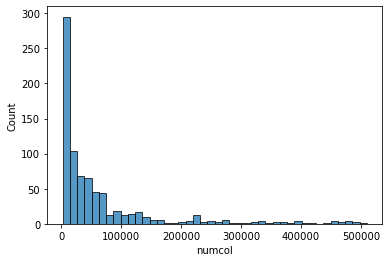

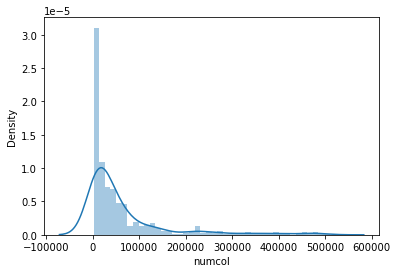

<AxesSubplot:xlabel='numcol'>

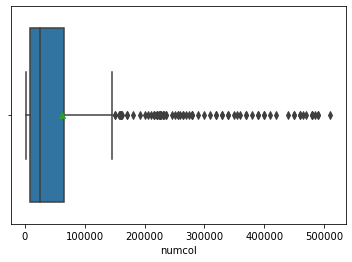

In [8]:
sns.histplot(honey['numcol'])
plt.show()
sns.distplot(honey['numcol'])
plt.show()
sns.boxplot(honey['numcol'],orient='v',showmeans='true')

* Skewed to the right
* A large amount of outliers above \~150k - consistent with the huge standard deviation value
* 75\% of the data sits under the mean value of \~62k

### yieldpercol: Honey yield per colony. Unit is pounds

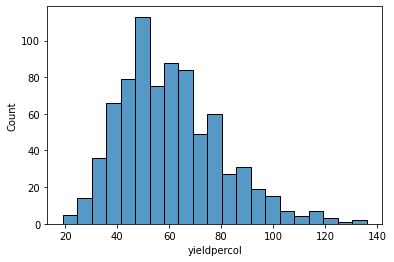

<AxesSubplot:xlabel='yieldpercol'>

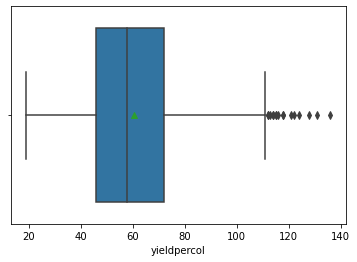

In [9]:
sns.histplot(honey['yieldpercol'])
plt.show()
sns.boxplot(honey['yieldpercol'],orient='v',showmeans='true')

* Slightly skewed to the right
* outliers above the 110 pound mark
* Median pretty close to average of 60 pounds

#### Totalprod: Total production (numcol x yieldpercol). Unit is pounds

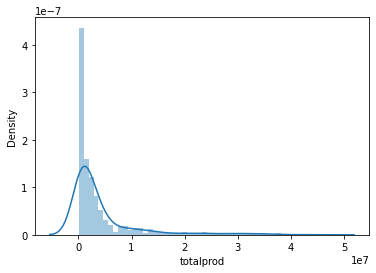

<AxesSubplot:xlabel='totalprod'>

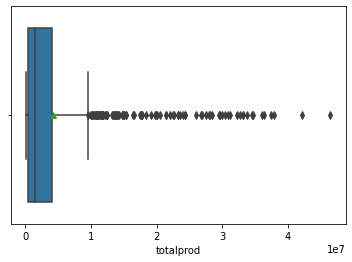

In [10]:
sns.distplot(honey['totalprod'])
plt.show()
sns.boxplot(honey['totalprod'],orient='v',showmeans='true')

* Huge number of outliers above \~9.5mil, consistent with huge standard deviation
* Also skewed to the right
* 75% of the data sits under approximately the mean value of ~\4 million
* Large amount of datapoints sitting between the 0 and 0.1e7 (1e6) mark. See focus capture on 0 to 2e6:

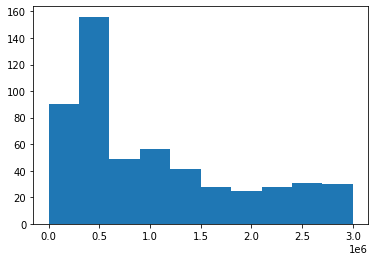

In [11]:
plt.hist(honey['totalprod'], range=[0,3000000]);

* Significant amounts of datapoints between 0.1e6 and 0.5e6 (100k-500k) pounds

### Stocks: Stocks held by producers. Unit is pounds

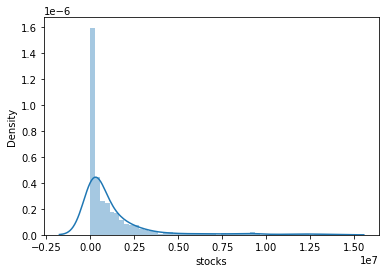

<AxesSubplot:xlabel='stocks'>

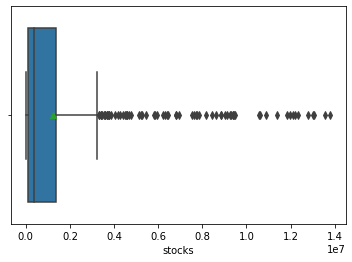

In [12]:
sns.distplot(honey['stocks'])
plt.show()
sns.boxplot(honey['stocks'],orient='v',showmeans='true')

* Once again, huge standard deviation and large amount of outliers above the \~0.3e7 pounds mark.
* The first bucket is huge. Taking a closer look:

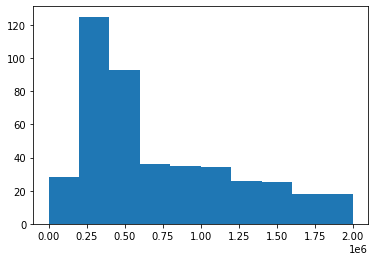

In [13]:
plt.hist(honey['totalprod'], range=[0,2000000]);

* Large amounts of datapoints between 0.25e6 and ~0.6e6 (250k-600k) pounds

### Priceperlb: Average price per pound based on expanded sales in dollars.

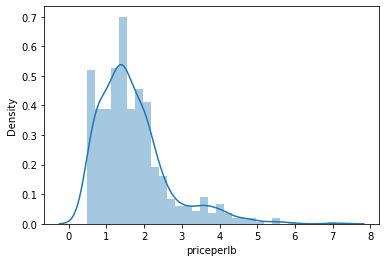

<AxesSubplot:xlabel='priceperlb'>

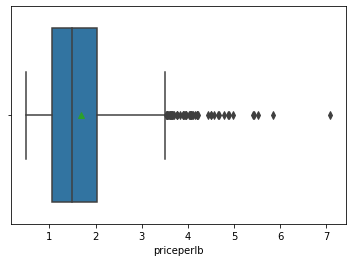

In [14]:
sns.distplot(honey['priceperlb'])
plt.show()
sns.boxplot(honey['priceperlb'],orient='v',showmeans='true')

* Skewed to the right
* Outliers present, but not extremely widespread values of outliers
* the maximum of the dataset seems to be 3.5, and the outliers range 2-3.5 dollars above that.

### Prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.

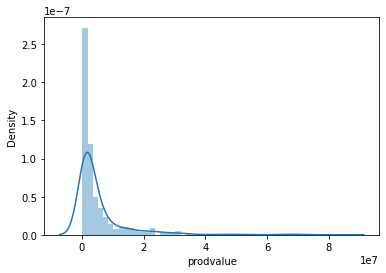

<AxesSubplot:xlabel='prodvalue'>

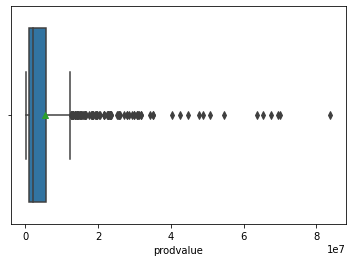

In [15]:
sns.distplot(honey['prodvalue'])
plt.show()
sns.boxplot(honey['prodvalue'],orient='v',showmeans='true')

* Very skewed to the right
* 75% of the data sits under the mean value which is 5.5 million dollars. The outliers range all the way up to 80 million dollars
* Outliers very much spread out

### Year: year of production

#### First step is to convert years as an int to a categorical variable

#### we know that the years range from 1998-2016

In [16]:
honey.year

0      1998
1      1998
2      1998
3      1998
4      1998
       ... 
780    2016
781    2016
782    2016
783    2016
784    2016
Name: year, Length: 785, dtype: int64

In [17]:
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [18]:
honey["year"] = honey["year"].apply(str)

In [19]:
honey.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year            object
dtype: object

#### Confirmed that year is now a categorical variable. See counts below:

In [20]:
honey["year"].value_counts()

2003    44
2001    44
2002    44
1998    43
1999    43
2000    43
2004    41
2008    41
2005    41
2007    41
2006    41
2015    40
2010    40
2014    40
2016    40
2012    40
2009    40
2011    40
2013    39
Name: year, dtype: int64

#### Visualizing the above:

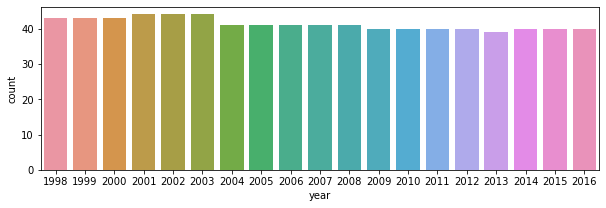

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(honey["year"])
plt.show()

### Bivariate analysis

-----------------------
### Question 1: How has honey production yield changed from 1998 to 2016?

* How has honey production yield changed from 1998 to 2016?
* Over time, what are the major production trends been across the states?
* Are there any patterns that can be observed between total honey production 
and value of production every year? How has value of production, which in some sense 
could be tied to demand, changed every year?

year v honey production yield
year v production trends across states?
year v states
total honey production vs production value every year
value of production over each year

In [22]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 49.2+ KB


##### Year vs Totalprod: Total honey production yield (numcol x yieldpercol). Unit is pounds

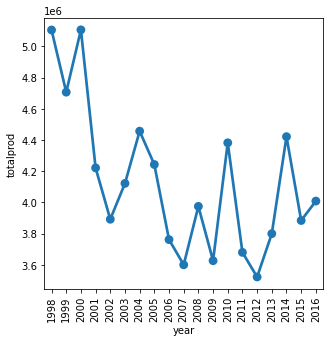

In [23]:
plt.figure(figsize=(5,5))
sns.pointplot(data = honey,x='year',y= 'totalprod',ci=None);
plt.xticks(rotation=90);

* Totalprod decreased over time
* But seems to be varying upward and downward from 2008 onward.

##### Year vs numcol: the number of honey producing colonies

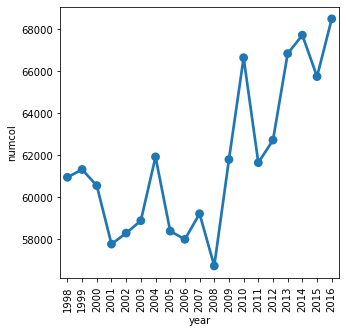

In [24]:
plt.figure(figsize=(5,5))
sns.pointplot(data = honey,x='year',y= 'numcol',ci=None);
plt.xticks(rotation=90);

* numcol mean fluctuated from 1998 to 2007
* numcol increased over time after 2008

##### Year vs yieldpercol: honey yield per colony

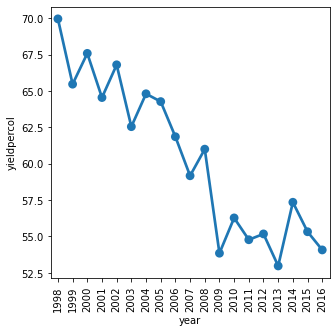

In [25]:
plt.figure(figsize=(5,5))
sns.pointplot(data = honey,x='year',y= 'yieldpercol',ci=None);
plt.xticks(rotation=90);

* Yieldpercol had a declining trend over time

#### Observations:
* Since the numcol mean increased over time since 2008 and the yieldpercol decreased over time:
* The decreasing trend in total production over the years can be pinpointed to the yieldpercol
* In other words: <b>it is the honey yield per colony that is responsible for the downward trend of the total production rather than the number of honey producing colonies</b>

-----------------------------

### Question 2: Over time, what have the major production trends been across the states?

##### First, just to get a general sense of the data: looking at state vs totalprod

In [26]:
df_sort = honey
df_sort = df_sort.sort_values('totalprod');

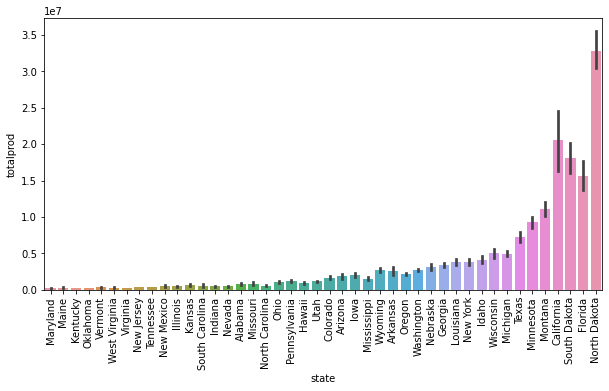

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='state', y='totalprod', data=df_sort)
plt.xticks(rotation=90);

* In general, the top 4 states with the largest totalprod have been: California, South Dakota, Florida, and North Dakota

##### Next, analyzing: state, year, and total prod:

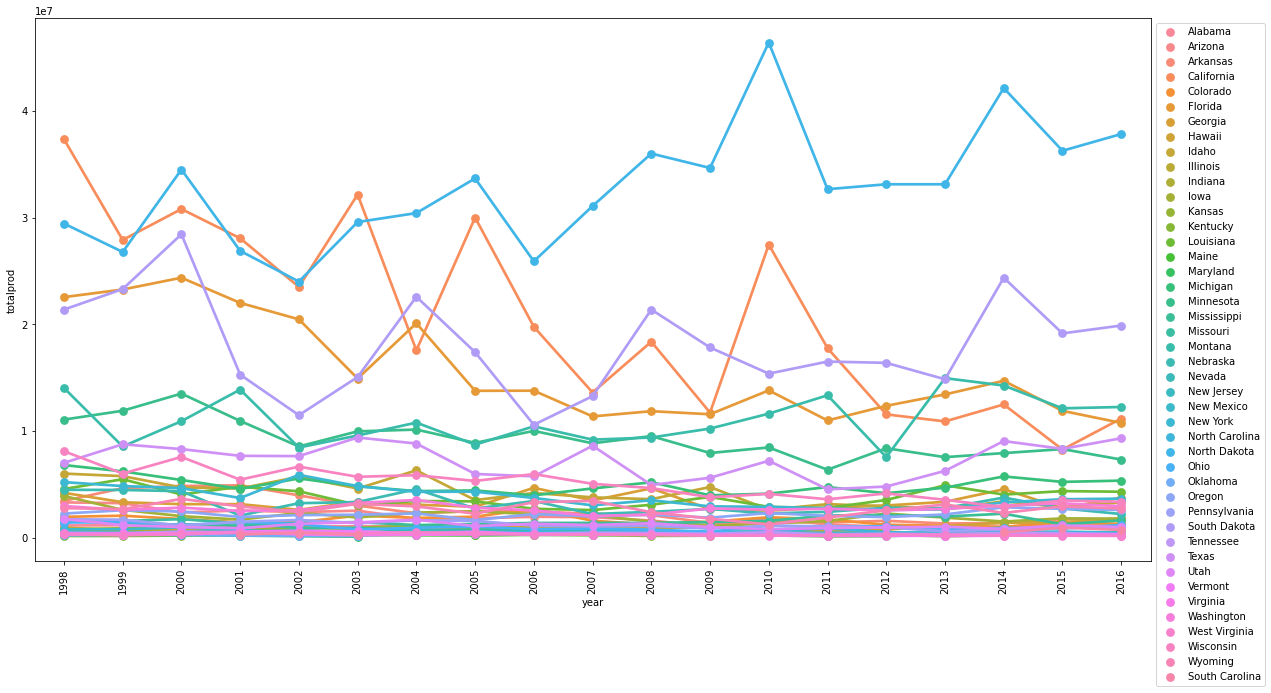

In [28]:
plt.figure(figsize = (20,10));
sns.pointplot(x='year', y='totalprod', data=honey, estimator=sum, ci=None, hue = 'state');
plt.legend(bbox_to_anchor=(1, 1),)
plt.xticks(rotation=90);

* There is clearly a lot to unpack here, but what is evident is that there are a lot of states that have had a similar totalprod over the years, both to each other and over time. But, there are some states that have a greater total_prod than the bulk of the others and have a lot more fluctuation over the years.
* The next plot will analyze this state by state:

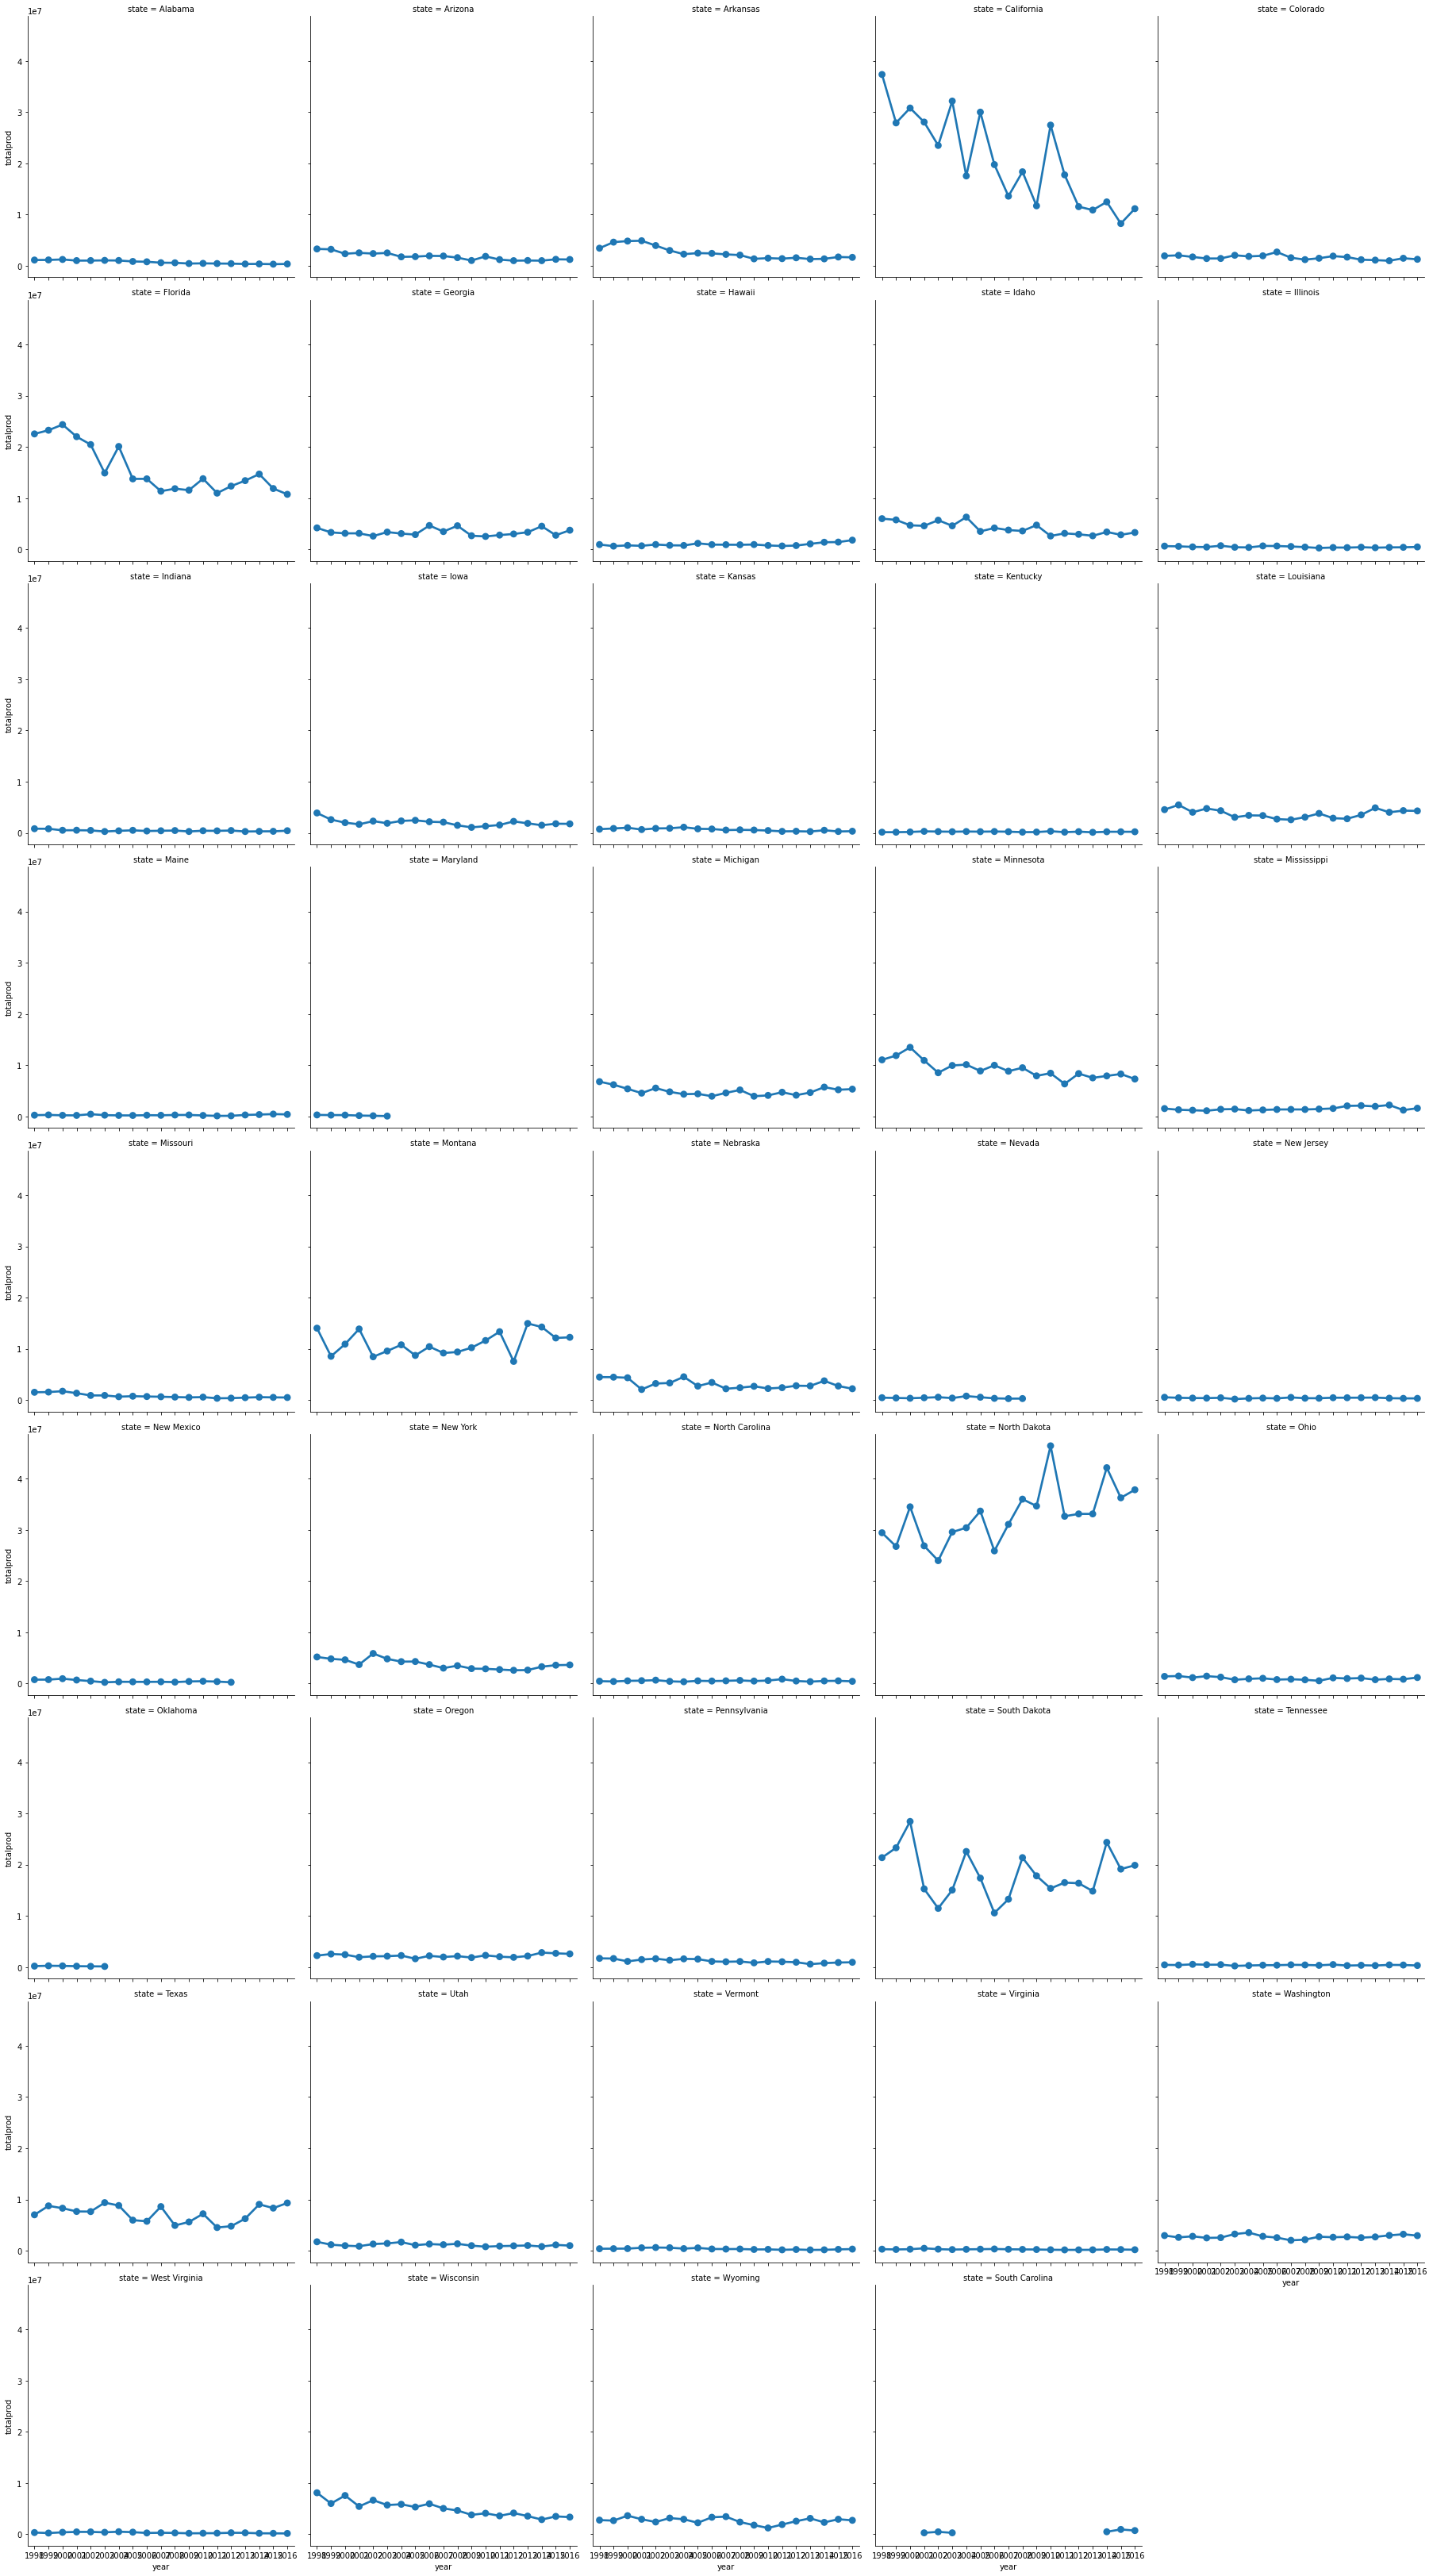

In [29]:
sns.catplot(x="year",
               y = "totalprod",
               col="state", 
               data=honey, 
               kind="point",
               col_wrap=5)

* California, Indiana, New York, South Dakota, Virginia, West Virginia, Nevada stand out the most as starting and ending with the largest mean totalprod over the years
* California, Indiana, and Nevada's mean totalprod declined over the years
* New York, Virgina, West Virginia, stayed pretty consistent over the years
* South Dakota's increased over the years

#### Next, checking to see trends in prodvalue over the years

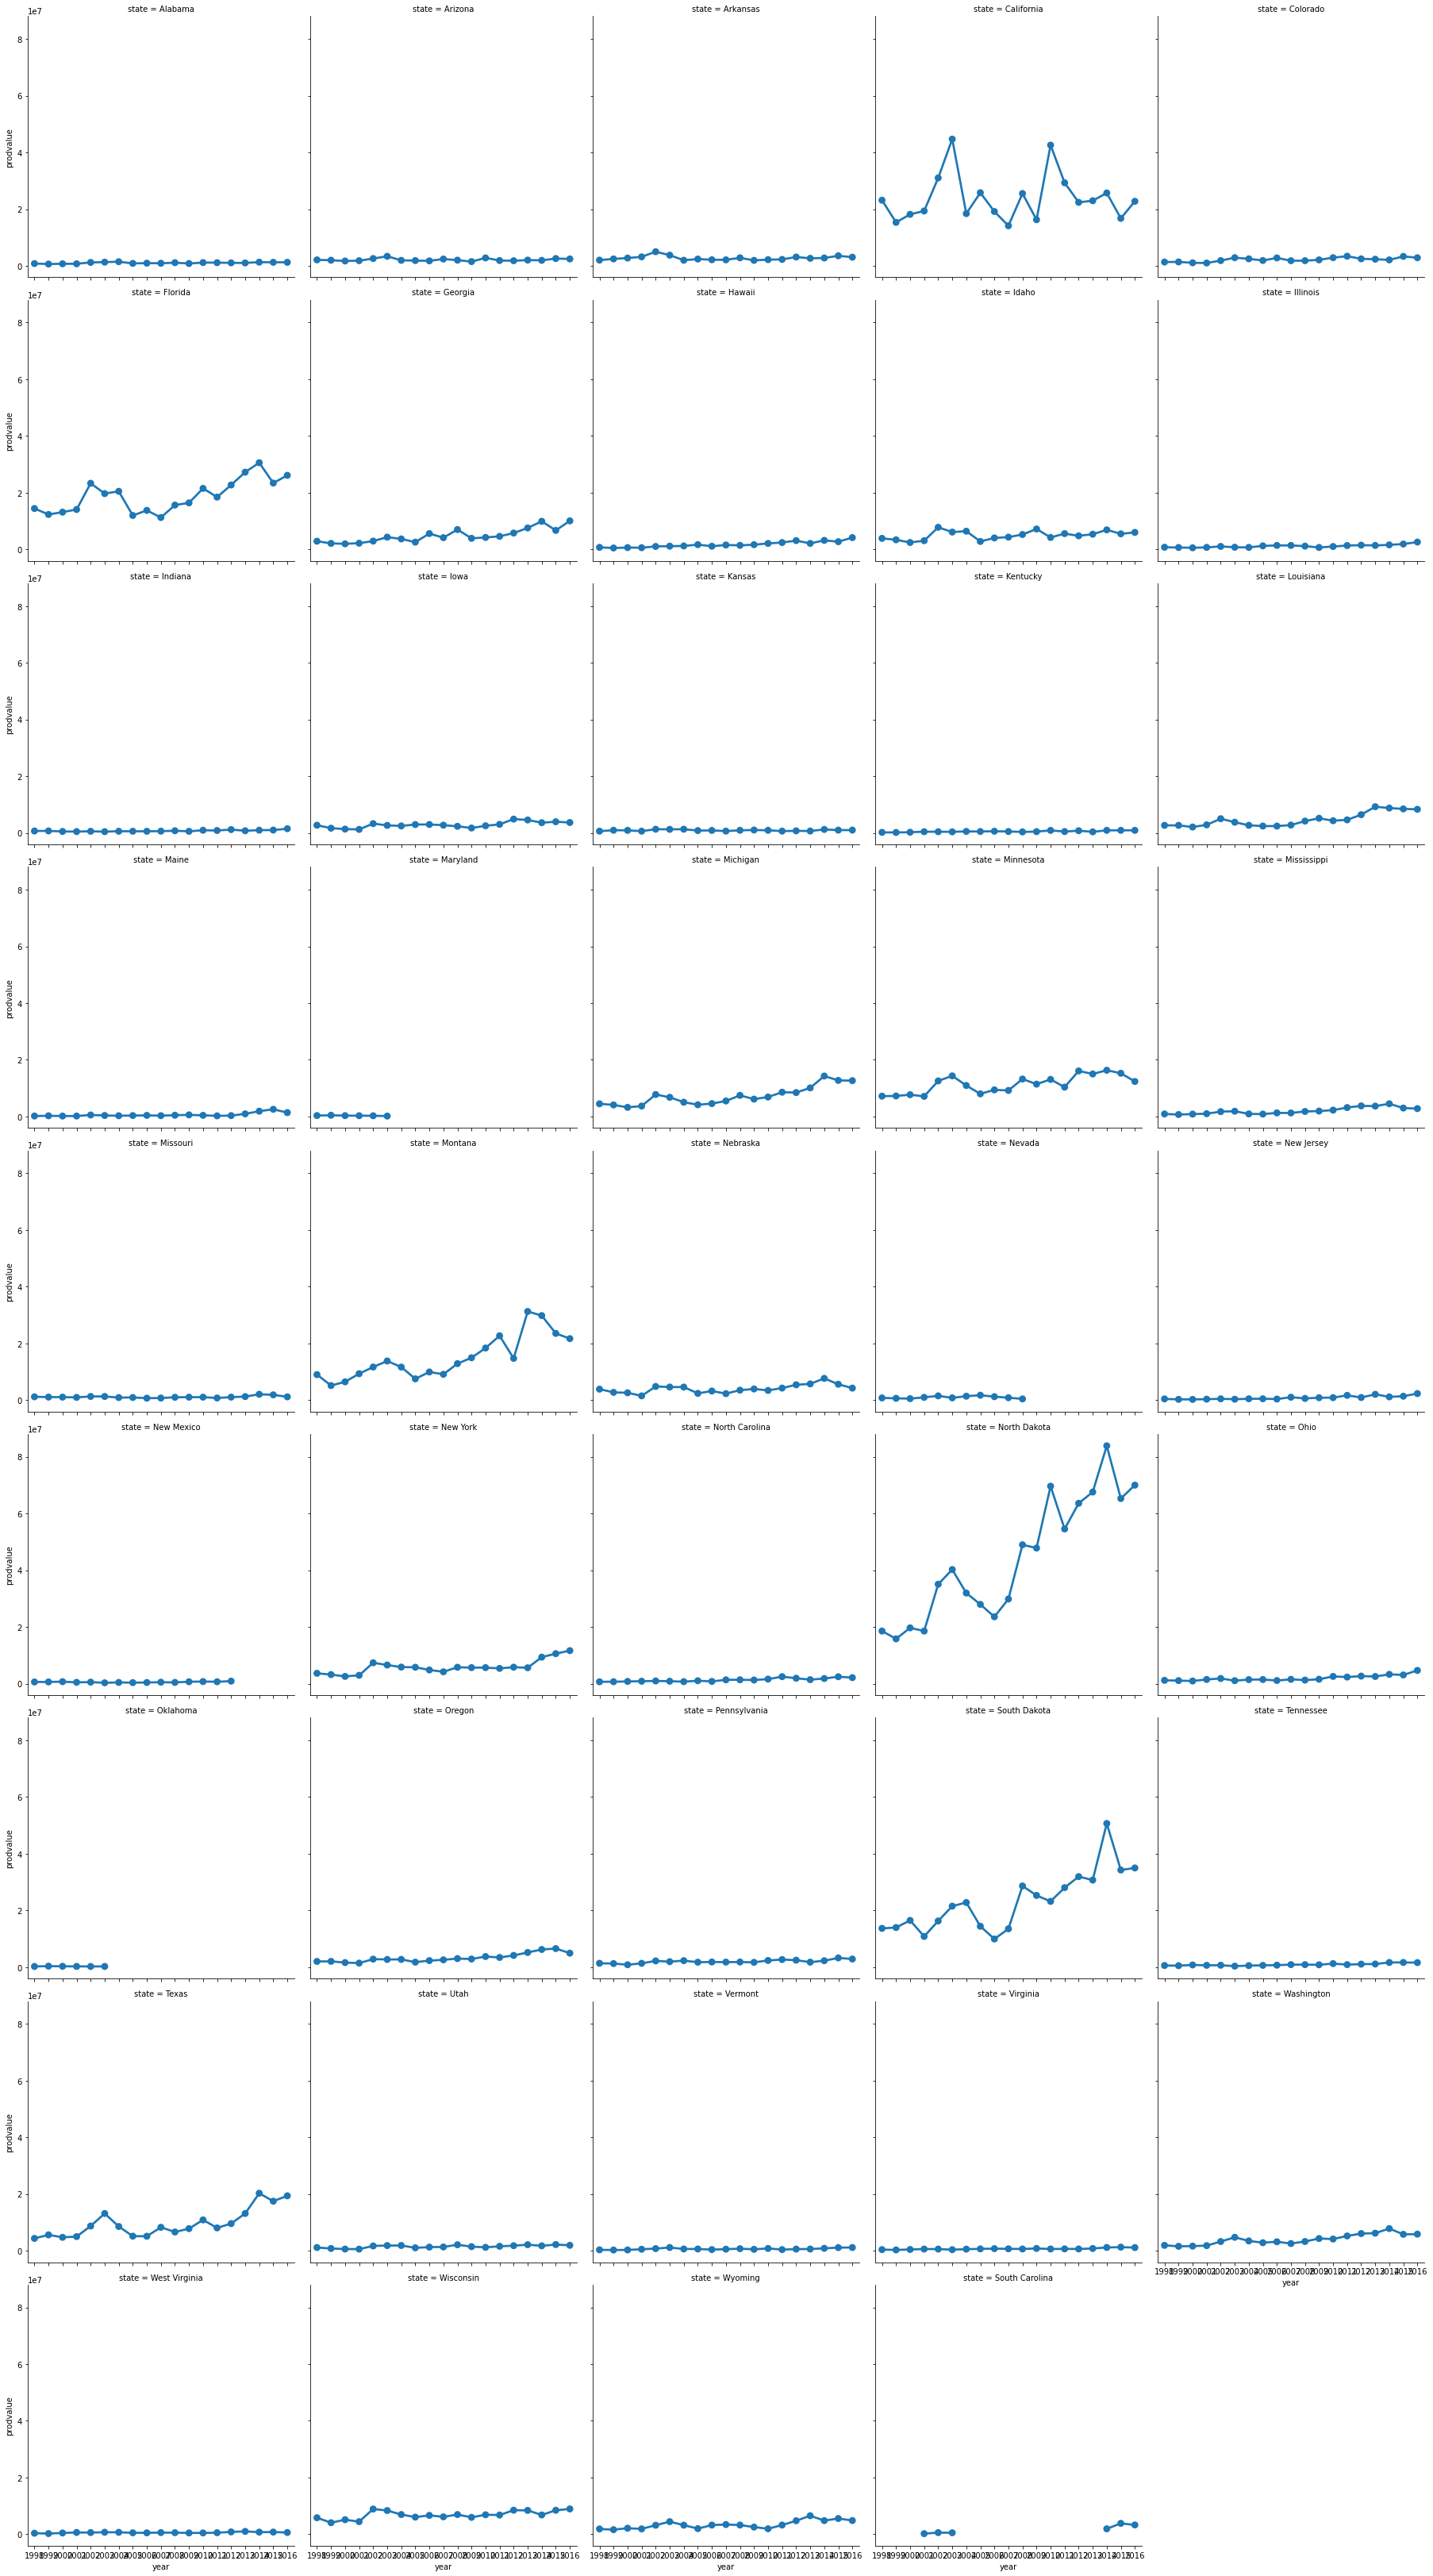

In [30]:
sns.catplot(x="year",
               y = "prodvalue",
               col="state", 
               data=honey, 
               kind="point",
               col_wrap=5)

* Indiana, New York, South Dakota, Virginia, West Virginia increased over the years
* California stayed about the same. 
* Overall trend is that the value of production went up or stayed the same over the years

-----------------------------

### Question 3: Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?


Comparing total honey prod (totalprod) and prodvalue over the years:

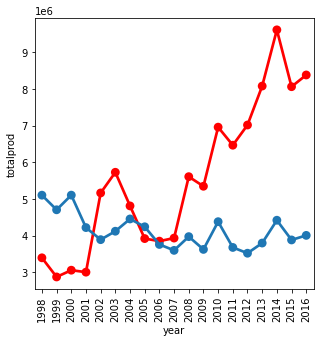

In [31]:
plt.figure(figsize=(5,5))
sns.pointplot(data = honey,x='year',y= 'prodvalue',ci=None,color='red');
sns.pointplot(data = honey,x='year',y= 'totalprod',ci=None);
plt.xticks(rotation=90);
plt.show()

* Total honey production has declined over the years, but the value of production (demand) has increased over the years